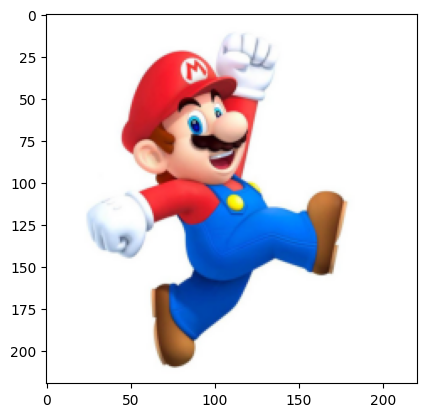

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

#https://drive.google.com/file/d/FILE_ID/view preview in webpage
#https://drive.google.com/uc?id=FILE_ID downloads the file
url = "https://drive.google.com/uc?id=1Qv3bBH_xW9uE3gNCoj2THuHZhSP2o2V6"
urllib.request.urlretrieve(url, "mario.png")

img_bgr = cv2.imread("mario.png")

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))


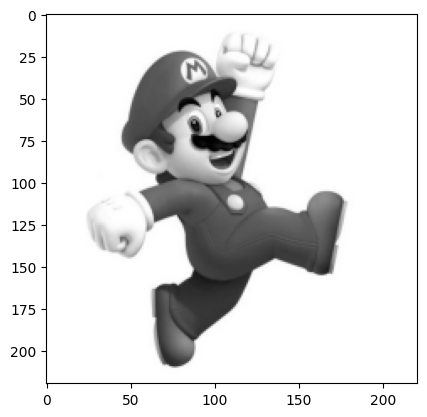

In [3]:
gray_cv2 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_cv2, cmap='gray')

# MANUAL
# img_bgr = img_bgr.astype(np.float32)
# R, G, B = img_bgr[:,:,2], img_bgr[:,:,1], img_bgr[:,:,0]
# gray = (0.2989*R + 0.5870*G + 0.1140*B).astype(np.uint8)
# plt.imshow(gray, cmap='gray')

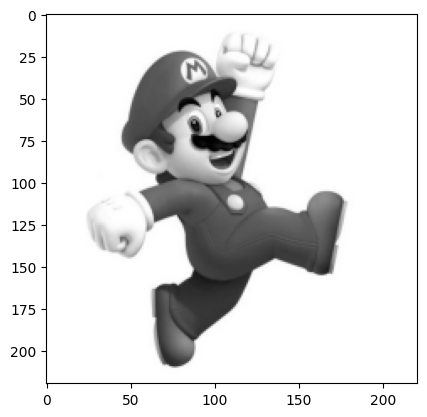

In [4]:
gray = gray_cv2.astype(np.float32)
gray_norm = gray / 255.0
plt.imshow(gray_norm, cmap="gray")

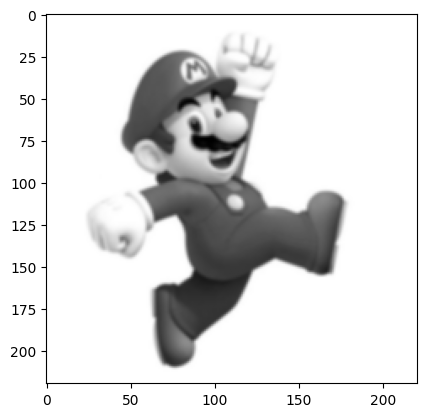

In [5]:
blur_gauss = cv2.GaussianBlur(gray_norm, (3,3), 0)
plt.imshow(blur_gauss, cmap="gray")

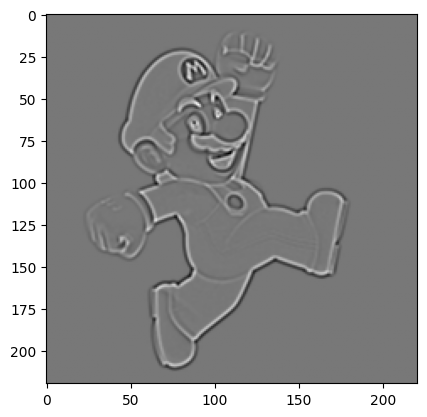

In [8]:
# SOBEL
# x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
# sobel_x=cv2.filter2D(blur_gauss, cv2.CV_32F, x)
# #ddepth=-1 same data type of pixels as original image, uint8 but we want negative numbers

# y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
# sobel_y=cv2.filter2D(blur_gauss, cv2.CV_32F, y)

# sx_disp = cv2.convertScaleAbs(sobel_x)
# sy_disp = cv2.convertScaleAbs(sobel_y)

# mag = cv2.magnitude(sobel_x, sobel_y)

# mag_disp = cv2.convertScaleAbs(mag)

# plt.subplot(1,3,1)
# plt.imshow(sx_disp, cmap="gray")

# plt.subplot(1,3,2)
# plt.imshow(sy_disp, cmap="gray")

# plt.subplot(1,3,3)
# plt.imshow(mag_disp, cmap="gray")

laplacian=np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplace_img=cv2.filter2D(blur_gauss, -1, laplacian)
# filter_img=cv2.convertScaleAbs(laplace_img)
plt.imshow(laplace_img, cmap="gray")

Normalized range: 7.161134e-10 → 1.0


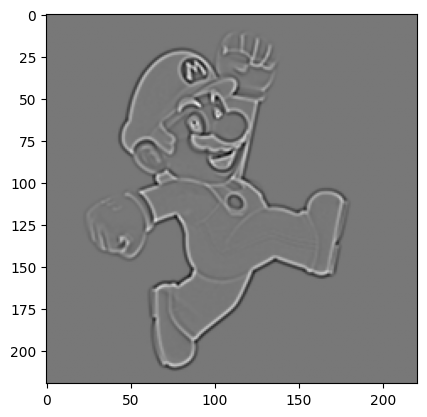

In [11]:
norm = cv2.normalize(laplace_img, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
#norm = (filter_img-filter_img.min())/ (filter_img.max()-filter_img.min())

print("Normalized range:", norm.min(), "→", norm.max())

plt.imshow(norm, cmap='gray')

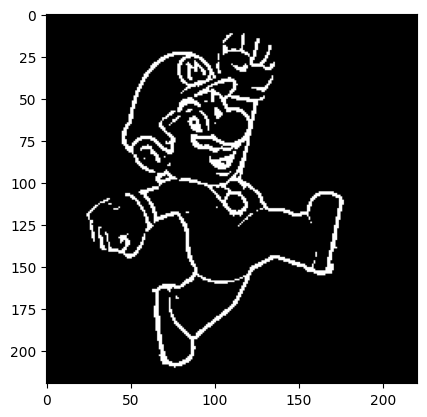

In [12]:
_, thr_global = cv2.threshold(norm, 0.5, 1, cv2.THRESH_BINARY)
plt.imshow(thr_global, cmap="gray")

# ADAPTIVE
# thr = np.mean(norm) + 0.5 * np.std(norm)
# thr = np.percentile(norm, 90)
# _, edge = cv2.threshold(norm, thr, 1, cv2.THRESH_BINARY)
# plt.imshow(edge, cmap="gray")
